In [1226]:
ls /data/keerthi/brainpubdata/213/BFIW | head

B_213-ST_BFIW-SE_10000_original.jpg
B_213-ST_BFIW-SE_10001_original.jpg
B_213-ST_BFIW-SE_1000_original.jpg
B_213-ST_BFIW-SE_1001_original.jpg
B_213-ST_BFIW-SE_1002_original.jpg
B_213-ST_BFIW-SE_1003_original.jpg
B_213-ST_BFIW-SE_1004_original.jpg
B_213-ST_BFIW-SE_1005_original.jpg
B_213-ST_BFIW-SE_1006_original.jpg
B_213-ST_BFIW-SE_1007_original.jpg
ls: write error: Broken pipe


In [1227]:
from skimage.filters.rank import mean as meanfilt
from skimage.segmentation import morphological_chan_vese
from skimage.transform import resize
from skimage.filters.rank import subtract_mean
from skimage.exposure import match_histograms, rescale_intensity
from skimage.morphology import binary_dilation, binary_closing, disk, area_opening
from skimage.io import imread
import numpy as np

In [1228]:
from matplotlib import pyplot as plt

In [1229]:
def rot270(arr3c):
    if len(arr3c.shape)==3:
        return np.flipud(np.transpose(arr3c,(1,0,2)))
    elif len(arr3c.shape)==2:
        return np.flipud(arr3c.T)
    else:
        raise NotImplementedError
        
def rot90(arr3c):
    if len(arr3c.shape)==3:
        return np.fliplr(np.transpose(arr3c,(1,0,2)))
    elif len(arr3c.shape)==2:
        return np.fliplr(arr3c.T)
    else:
        raise NotImplementedError
        
def rot180(arr3c):
    return np.fliplr(np.flipud(arr3c))

def rotateim(arr3c,rotval):
    if rotval==90:
        return rot90(arr3c)
    if rotval==180:
        return rot180(arr3c)
    if rotval==270:
        return rot270(arr3c)
    return arr3c


In [1230]:


# import cv2 as cv

# def white_balance(img):
#     result = cv.cvtColor(img, cv.COLOR_RGB2LAB).astype(float)
    
#     # avg_a = np.average(result[-500:-250,500:1000, 1])
#     # avg_b = np.average(result[-500:-250,500:1000, 2])
#     avg_a = np.average(result[...,1])
#     avg_b = np.average(result[...,2])
#     result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
#     result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
#     print(np.max(result[...,1]))
#     result = cv.cvtColor(result.astype(np.uint8), cv.COLOR_LAB2RGB)
#     return result

In [1386]:
def bfi_alter(bfi_crop):
    bfi_crop_fl = bfi_crop.astype(float)

    bfi_crop_fl = np.dstack([
        np.clip(bfi_crop_fl[...,0]*0.95,0,250),
        bfi_crop_fl[...,1]*0.8,
        (np.clip(bfi_crop_fl[...,0]*0.4+bfi_crop_fl[...,1]*0.3+bfi_crop_fl[...,2]*0.3 ,0,255))
     ])

    return bfi_crop_fl.astype(np.uint8)
    
    # return white_balance(bfi_crop_u8)

def bfi_bgboost(bfi_crop, whitergn):
    # whitergn = bfi_crop[-500:-250,500:1000,:]
    bfi_crop_copy = bfi_crop.copy().astype(float)
    
    for ch in range(3):
        chmean = whitergn[...,ch].mean()
        chstd = whitergn[...,ch].std()
        den = chmean+2*chstd
        print(ch,den)
        bfi_crop_copy[...,ch]=rescale_intensity(bfi_crop_copy[...,ch]/den,out_range=(0,255))

    return bfi_crop_copy.astype(np.uint8)

In [1387]:
# def rectmask(M1):
#     colsumdx = np.diff(M1.max(axis=0).astype(int))
#     c1 = np.where(colsumdx==1)[0]
#     if len(c1)==0:
#         c1=0
#     else:
#         c1=c1[0]
#     try:
#         c2 = np.where(colsumdx==-1)[-1][0]
#     except:
#         c2 = M1.shape[1]

#     rowsumdx = np.diff(M1.max(axis=1).astype(int))
#     r1 = np.where(rowsumdx==1)[0]
#     if len(r1)==0:
#         r1=0
#     else:
#         r1=r1[0]
#     try:
#         r2  = np.where(rowsumdx==-1)[-1][0]
#     except:
#         r2 = M1.shape[0]
        
#     M2 = np.zeros_like(M1)
#     # print(r1,r2,c1,c2)
#     M2[r1:r2,c1:c2]=1
#     return M2

In [3191]:
bfi_slices = {
    '213':{'r':slice(500,1700),'c':slice(800,2300)},
    '222':{'r':slice(100,1500),'c':slice(1100,2300)},
    '141':{'r':slice(200,1400),'c':slice(800,2700)},
    '142':{'r':slice(250,1950),'c':slice(300,2300)},
    '244':{'r':slice(250,250+1700),'c':slice(950,950+1700)},
}
bfi_rot = {
    '213': 90,
    '222':90,
    '141':180,
    '142':0,
    '244':90,
}

white_rgn = {
    # '213': {'r':slice(50,150),'c':slice(50,150)},
    '213':{'r':slice(50,150),'c':slice(1300,1400)},
    # '141': {'r':slice(1000,1200),'c':slice(500,700)},
    '141': {'r':slice(950,1100), 'c':slice(1250,1450)},
    '142': {'r':slice(1200,1400),'c':slice(1400,1600)},
    # '244':{'r':slice(100,300),'c':slice(100,300)},
    '244':{'r':slice(600,800),'c':slice(1250,1450)},
    '222':{'r':slice(100,200),'c':slice(850,1000)},
}

In [3689]:
biosampleid = '222'

In [3690]:
datadir='/data/keerthi/brainpubdata/%s/BFIW' % biosampleid

In [3691]:
import glob

In [3692]:
bfidict={}
for fn in glob.glob(datadir+'/*-SE_*_original.jpg'):
    secno = fn.split('_')[3]
    bfidict[secno]=fn

In [3693]:
bfidict.keys()

dict_keys(['1501', '504', '631', '894', '1031', '584', '462', '1576', '1757', '920', '1414', '1134', '547', '21', '646', '610', '282', '522', '134', '1300', '206', '1406', '396', '727', '1178', '470', '948', '150', '878', '110', '1552', '86', '70', '702', '62', '1614', '1063', '423', '24', '1666', '496', '1719', '1293', '740', '819', '681', '1109', '1314', '953', '1634', '1074', '105', '602', '1669', '1670', '296', '518', '1647', '1022', '593', '1359', '775', '889', '531', '3', '1115', '208', '1273', '512', '655', '305', '832', '927', '460', '721', '1070', '420', '133', '251', '810', '1503', '1321', '1247', '1506', '367', '1127', '201', '79', '663', '1030', '1650', '1327', '172', '36', '1298', '866', '1641', '921', '270', '485', '23', '30', '1509', '1487', '573', '191', '1042', '322', '725', '207', '1724', '109', '262', '371', '821', '1547', '1732', '1123', '226', '1141', '714', '1711', '398', '1368', '1269', '438', '677', '1292', '1545', '567', '379', '530', '1054', '1014', '119', '87

In [3694]:
# 244
# good corrections - 1022, 997, 844, 2485, 313
# work in progress - 1489, 1780, 

# large sections:
# 141: 758
# 213: 1606
# 244: 1022
# 142: 1011 
# 222: 926

bfiname = bfidict['1034']

bfi_im = imread(bfiname)
if biosampleid=='213': # or True:
    bfi_im2 = bfi_alter(bfi_im)
else:
    bfi_im2 = bfi_im

bfi_crop0 = bfi_im[bfi_slices[biosampleid]['r'], bfi_slices[biosampleid]['c']] 

bfi_crop1 = bfi_im2[bfi_slices[biosampleid]['r'], bfi_slices[biosampleid]['c']] 
if biosampleid=='213':
    whitergn = bfi_crop1[white_rgn[biosampleid]['r'], white_rgn[biosampleid]['c']]
    bfi_crop1 = bfi_bgboost(bfi_crop1,whitergn)

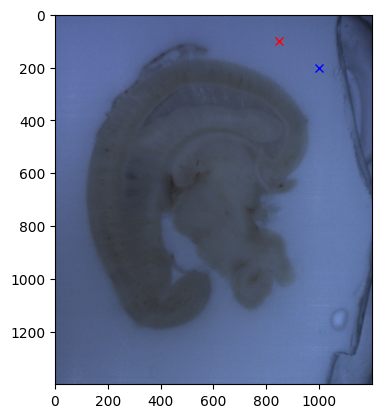

In [3695]:
plt.imshow(bfi_crop1) #[...,2],cmap='gray')
rows=white_rgn[biosampleid]['r']
cols=white_rgn[biosampleid]['c']

plt.plot(cols.start,rows.start,'rx')
plt.plot(cols.stop,rows.stop,'bx')

In [3696]:
bfi_crop1.shape

(1400, 1200, 3)

In [3697]:
# bfi_matched = match_histograms(bfi_crop1, bfi_corr1)

In [3724]:
def match_mu_sd(im, ref_mu, ref_sd):
    out = im.copy()
    for ch in range(3):
        mu = im[...,ch].mean()
        sd = im[...,ch].std()
        
        out[...,ch]=np.clip(((out[...,ch]-mu)/sd*ref_sd[ch])+ref_mu[ch],10,255)
    return out

In [3725]:
refmu = [160,155,150]
refsd = [47, 51, 56]
if biosampleid=='213': 
    refmu = [150,150,150]
    refsd = [50, 55, 65]
if biosampleid=='222':
    refmu = [210,205,205]
    
bfi_matched = match_mu_sd(bfi_crop1, refmu, refsd)

In [3726]:
whitergn = bfi_matched[white_rgn[biosampleid]['r'],white_rgn[biosampleid]['c']]

In [3727]:
wm=[whitergn[...,ch].mean() for ch in range(3)]
wm

[243.23933333333332, 243.111, 252.70466666666667]

In [3728]:
# plt.imshow(bfi_matched.astype(np.uint8))
# plt.imshow(bfi_corr1)

In [3729]:
bfi_rotated = rotateim(bfi_matched,bfi_rot[biosampleid])

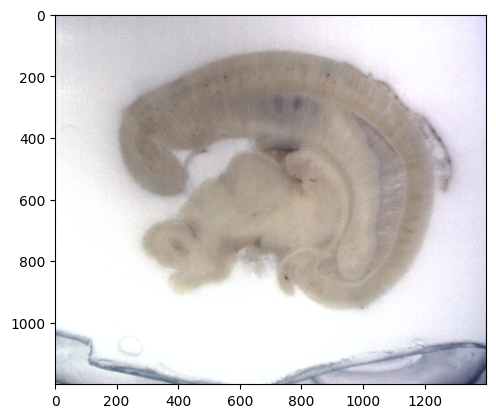

In [3730]:
plt.imshow(bfi_rotated)

In [3731]:

# if biosampleid=='213': # or True:
#     bfi_im2 = bfi_alter(bfi_im)
# else:
#     bfi_im2 = bfi_im
#     # bfi_im[...,2]=(bfi_im[...,1].astype(float)*0.5+bfi_im[...,2].astype(float)*0.2).astype(np.uint8)
    
# bfi_crop2 = bfi_im2[bfi_slices[biosampleid]['r'], bfi_slices[biosampleid]['c']]
# whitergn = bfi_crop2[white_rgn[biosampleid]['r'], white_rgn[biosampleid]['c']]
# bfi_corr1 = bfi_bgboost(bfi_crop2, whitergn)
# whitergn2 = bfi_corr1[white_rgn[biosampleid]['r'],white_rgn[biosampleid]['c']]

In [3732]:
# plt.figure(figsize=(12,8))
# plt.subplot(1,2,1)
# plt.imshow(bfi_crop2)
# rows=white_rgn[biosampleid]['r']
# cols=white_rgn[biosampleid]['c']

# plt.plot(cols.start,rows.start,'rx')
# plt.plot(cols.stop,rows.stop,'bx')

# plt.subplot(1,2,2)
# bfi_rotated = rotateim(bfi_corr1, bfi_rot[biosampleid])
# plt.imshow(bfi_corr1)

In [3733]:
niter=20
if biosampleid=='213':
    niter = 80
if biosampleid=='142':
    niter = 50
if biosampleid=='141':
    niter = 100
if biosampleid=='222':
    niter = 50
msk_bfi = morphological_chan_vese(bfi_rotated[::4,::4,2],num_iter=niter, init_level_set='disk')


In [3734]:
maximg = np.max(bfi_rotated[::4,::4,:],axis=2)
if biosampleid=='213':
    maximg = bfi_rotated[::4,::4,1]

In [3735]:
M1=binary_dilation(binary_closing(msk_bfi>0,disk(11)),disk(15))
M2 = M1 # rectmask(M1)
M3 = resize(M2,bfi_rotated.shape[:2])>0

In [3736]:
msk_bg = binary_dilation(area_opening(maximg<100,2000),disk(11)) & ~ M1 # & (bfi_rotated[::4,::4,2]<100)# & (bfi_rotated[::4,::4,2]<120)

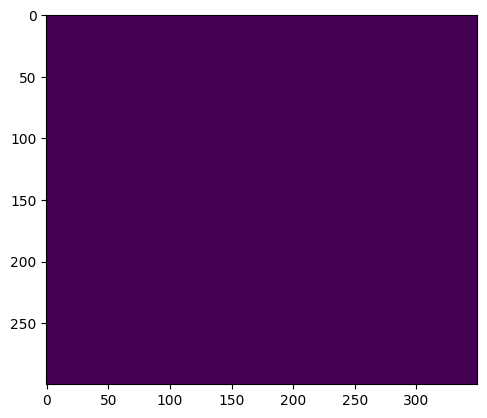

In [3737]:
plt.imshow(msk_bg)
    # msk_bg) # msk_bfi) #maximg<100,cmap='gray')

In [3738]:
# from skimage.filters import threshold_multiotsu

In [3739]:
# levels = threshold_multiotsu(maximg)

In [3740]:
# levels

In [3741]:
msk_bg2 = resize(msk_bg,bfi_rotated.shape[:2])>0

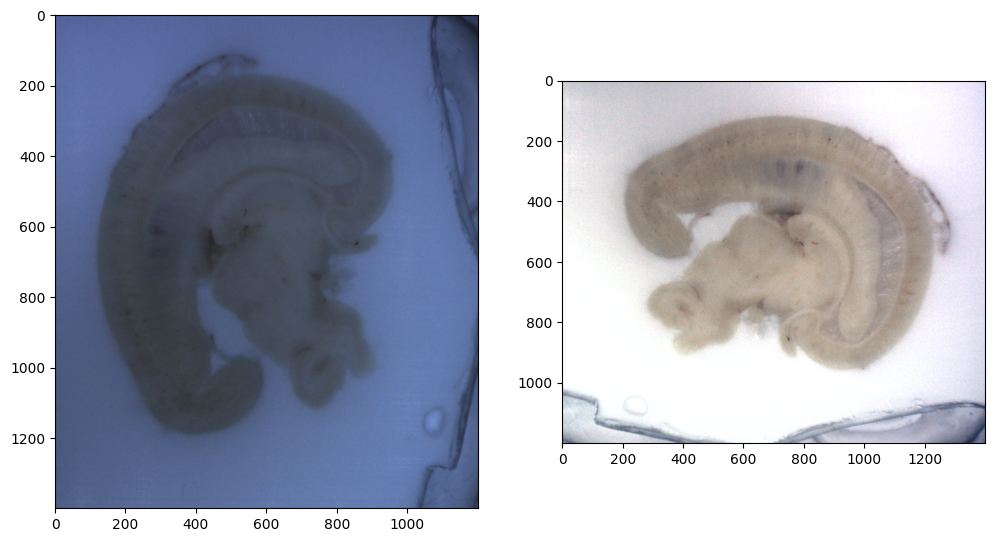

In [3742]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(bfi_crop0) #[...,2],cmap='gray')

# plt.subplot(1,3,2)
# plt.imshow(M3)

bfi_masked = bfi_rotated.copy()
for ch in range(3):
    bfi_masked[...,ch][msk_bg2]=wm[ch]

plt.subplot(1,2,2)
plt.imshow(bfi_masked)
